### Installing the required dependencies

In [15]:
!pip install -U ultralytics

   ---------------------------------------- 0.0/869.4 kB ? eta -:--:--
   ------------ --------------------------- 262.1/869.4 kB ? eta -:--:--
   ------------------------ --------------- 524.3/869.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 869.4/869.4 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.79
    Uninstalling ultralytics-8.2.79:
      Successfully uninstalled ultralytics-8.2.79


In [16]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
!cd yolov5 & pip install -r requirements.txt

In [34]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


### Load the Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-21 Python-3.10.14 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Make Detections

In [49]:
imgs = 'https://tse2.mm.bing.net/th?id=OIP.DyV6LfesCZ-RUhltleFS-AHaFX&pid=Api&P=0&h=180'

In [50]:
results = model(imgs)
results.print()

C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 180x248 (no detections)
Speed: 1684.2ms pre-process, 4.6ms inference, 189.5ms NMS per image at shape (1, 3, 480, 640)


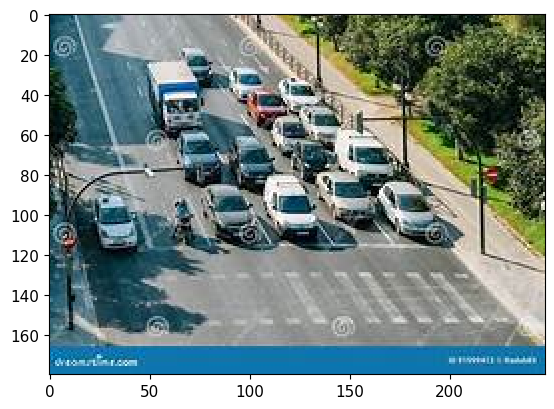

In [51]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

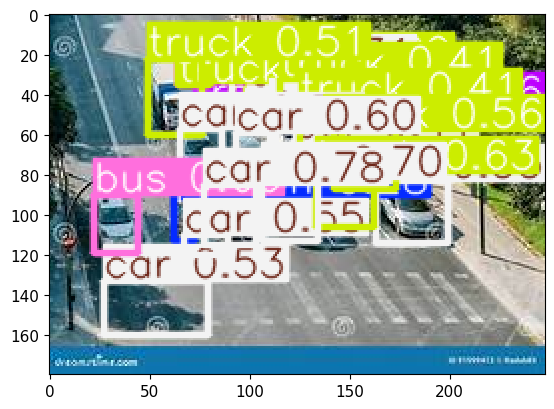

In [10]:
plt.imshow(np.squeeze(results.render()))

### Real Time Detections

In [11]:
import cv2
import torch


# Initialize the video capture
cap = cv2.VideoCapture(0)

# Set a smaller frame size for faster processing (optional)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Pass the frame to the model for inference
    results = model(frame)

    # Render the results on the frame
    img = np.squeeze(results.render())  # Process the result for display

    # Display the processed frame
    cv2.imshow('YOLO', img)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any open windowsq
cap.release()
cv2.destroyAllWindows()


C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models

### Train from Scratch

In [36]:
import uuid   ## unique identifier
import os
import time

In [37]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [10]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 3 second delay between captures
        time.sleep(3)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [29]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.71557382-6145-11ef-be43-d03957e54d7e.jpg


In [30]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.73fb02da-6145-11ef-950e-d03957e54d7e.jpg
data\images\awake.73fb02db-6145-11ef-8605-d03957e54d7e.jpg
data\images\awake.73fb02dc-6145-11ef-be41-d03957e54d7e.jpg
data\images\awake.73fb02dd-6145-11ef-b34f-d03957e54d7e.jpg
data\images\awake.73fb02de-6145-11ef-8962-d03957e54d7e.jpg
data\images\awake.73fb02df-6145-11ef-aab1-d03957e54d7e.jpg
data\images\awake.73fb02e0-6145-11ef-8d86-d03957e54d7e.jpg
data\images\awake.73fb02e1-6145-11ef-b07c-d03957e54d7e.jpg
data\images\awake.73fb02e2-6145-11ef-9ee6-d03957e54d7e.jpg
data\images\awake.73fb02e3-6145-11ef-afaf-d03957e54d7e.jpg
data\images\awake.73fb02e4-6145-11ef-a86d-d03957e54d7e.jpg
data\images\awake.73fb02e5-6145-11ef-a274-d03957e54d7e.jpg
data\images\awake.73fb02e6-6145-11ef-87d9-d03957e54d7e.jpg
data\images\awake.73fb02e7-6145-11ef-aa9e-d03957e54d7e.jpg
data\images\awake.73fb02e8-6145-11ef-87cb-d03957e54d7e.jpg
data\images\awake.73fb02e9-6145-11ef-abb0-d03957e54d7e.jpg
data\images\awake.73fb02ea-6145-11ef-af48-d03957e54d7e.j

In [14]:
!git clone  https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [38]:
import matplotlib
matplotlib.use('agg')
print(matplotlib.get_backend())  # This should print 'agg'


agg


In [17]:
import os
os.environ.pop('MPLBACKEND', None)  # Remove MPLBACKEND environment variable if it exists
import matplotlib
matplotlib.use('agg')  # Use the 'agg' backend
import matplotlib.pyplot as plt  # Now import pyplot


In [26]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\amren\OneDrive\Desktop\dplppy\Deep': No such file or directory
YOLOv5  2024-8-21 Python-3.10.14 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.

### Load Model

In [44]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\amren/.cache\torch\hub\master.zip
YOLOv5  2024-8-24 Python-3.10.14 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [52]:
img = os.path.join('data', 'images', 'awake.53c5ed23-6043-11ef-a400-d03957e54d7e.jpg')

In [53]:
results = model(img)

C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [54]:
results.print()

image 1/1: 480x640 1 awake
Speed: 759.4ms pre-process, 3.1ms inference, 198.3ms NMS per image at shape (1, 3, 480, 640)


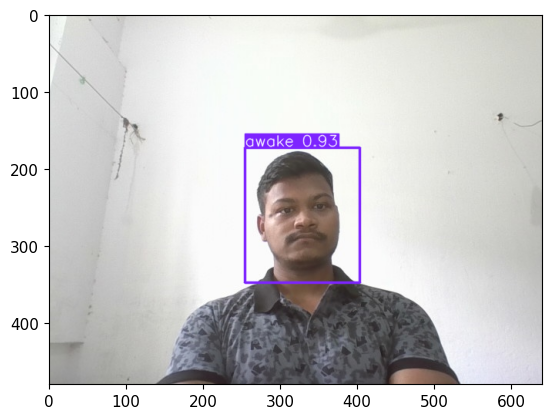

In [55]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [56]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\amren/.cache\torch\hub\ultralytics_yolov5_master\models